New Model



In [6]:
import os
import kagglehub

# Download (or get the existing path)
dataset_path = kagglehub.dataset_download("nvnikhil0001/sisfall-enhanced")
print("Dataset path:", dataset_path)

# List all files/folders in that path
print("Files in the dataset folder:")
print(os.listdir(dataset_path))


Dataset path: /kaggle/input/sisfall-enhanced
Files in the dataset folder:
['Three Classes', '.nfs000000000dc61838000001d2']


In [7]:
import os

root_folder = "/kaggle/input/sisfall-enhanced"

for dirpath, dirnames, filenames in os.walk(root_folder):
    print(f"\nDirectory: {dirpath}")
    for file in filenames:
        print(" -", file)



Directory: /kaggle/input/sisfall-enhanced
 - .nfs000000000dc61838000001d2

Directory: /kaggle/input/sisfall-enhanced/Three Classes
 - x_val_3
 - y_train_3
 - x_test_3
 - y_val_3
 - weights_3.txt
 - x_train_3
 - y_test_3


In [8]:
import os

base_path = "/kaggle/input/sisfall-enhanced/Three Classes"  # or your actual path
file_path = os.path.join(base_path, "x_train_3")

with open(file_path, "rb") as f:
    header = f.read(64)
    print("Raw header bytes:\n", header)


Raw header bytes:
 b'bMy<\x03\xc1k\xbe\xc4\xb0\xbc<\xef"\xfe\xba5\xd8\xf3;\xd1~U\xbb\xa6\xdew<>\xc2k\xbe\xe3\x96\xbb<\x906\x05\xbb\xd3\x8e\xf1;\xac?T\xbb\xa4sv<W\xc3k\xbe\xaaa\xba<ng\x0c\xbb'


In [11]:
import numpy as np
x_train = np.fromfile(os.path.join(base_path, "x_train_3"), dtype=np.float32)

# Print a snippet to understand the shape
print("Raw x_train shape:", x_train.shape)
print("Sample:", x_train[:20])


Raw x_train shape: (119609856,)
Sample: [ 0.0152162  -0.23022847  0.02303351 -0.00193891  0.00744155 -0.00325768
  0.01512877 -0.23023316  0.0228991  -0.00203267  0.00737176 -0.00323866
  0.01504222 -0.23023735  0.02275165 -0.0021424   0.00727622 -0.0032057
  0.01495669 -0.23024072]


In [13]:
y_train = np.fromfile(os.path.join(base_path, "y_train_3"), dtype=np.float32)
print("y_train shape:", y_train.shape)
print("Sample:", y_train[:10])


y_train shape: (58403,)
Sample: [2.350989e-38 9.183550e-41 3.587324e-43 2.350989e-38 9.183550e-41
 3.587324e-43 2.350989e-38 9.183550e-41 3.587324e-43 2.350989e-38]


In [14]:
num_samples = y_train.shape[0]
time_steps = 2048
num_features = 1

expected_size = num_samples * time_steps * num_features
actual_size = x_train.size

print("Expected:", expected_size)
print("Actual:", actual_size)


Expected: 119609344
Actual: 119609856


In [15]:
x_train = x_train[:119609344]  # Trim the excess
x_train = x_train.reshape((58403, 2048, 1))  # Now reshape safely
print("x_train shape:", x_train.shape)


x_train shape: (58403, 2048, 1)


In [16]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize x_train
x_train = x_train / np.max(np.abs(x_train))  # or use scaler if needed

# Check y_train
print("Unique classes in y_train:", np.unique(y_train))


Unique classes in y_train: [0.0000000e+00 1.4012985e-45 3.5873241e-43 3.6013371e-43 9.1835496e-41
 9.1836897e-41 9.2194229e-41 2.3509887e-38 2.3509890e-38 2.3510604e-38
 2.3693558e-38]


In [17]:
for i in range(1, 10):
    if y_train.size % i == 0:
        print(f"Trying shape: ({y_train.size // i}, {i})")


Trying shape: (58403, 1)


In [18]:
import os
import numpy as np

base_path = "/kaggle/input/sisfall-enhanced/Three Classes"
y_train_path = os.path.join(base_path, "y_train_3")

# Try loading as binary float32 (since values were very small earlier)
y_train_raw = np.fromfile(y_train_path, dtype=np.float32)

print("Raw y_train shape:", y_train_raw.shape)
print("Sample values:", y_train_raw[:20])
print("Unique values:", np.unique(y_train_raw))


Raw y_train shape: (58403,)
Sample values: [2.3509890e-38 9.1835496e-41 3.5873241e-43 2.3509890e-38 9.1835496e-41
 3.5873241e-43 2.3509890e-38 9.1835496e-41 3.5873241e-43 2.3509890e-38
 9.1835496e-41 3.5873241e-43 2.3509890e-38 9.1835496e-41 3.5873241e-43
 2.3510604e-38 9.1835496e-41 3.5873241e-43 2.3509890e-38 9.1835496e-41]
Unique values: [0.0000000e+00 1.4012985e-45 3.5873241e-43 3.6013371e-43 9.1835496e-41
 9.1836897e-41 9.2194229e-41 2.3509887e-38 2.3509890e-38 2.3510604e-38
 2.3693558e-38]


In [19]:
# Remove the extra elements so it's divisible by 3
trimmed_len = (y_train_raw.size // 3) * 3
y_train_trimmed = y_train_raw[:trimmed_len]

# Reshape and convert
y_train_reshaped = y_train_trimmed.reshape(-1, 3)
y_train_labels = np.argmax(y_train_reshaped, axis=1)

# Sanity check
print("y_train_labels shape:", y_train_labels.shape)
print("Sample class labels:", y_train_labels[:10])
print("Unique class labels:", np.unique(y_train_labels))


y_train_labels shape: (19467,)
Sample class labels: [0 0 0 0 0 0 0 0 0 0]
Unique class labels: [0 1 2]


In [20]:
x_train = np.fromfile("/kaggle/input/sisfall-enhanced/Three Classes/x_train_3", dtype=np.float32)


In [21]:
x_train_raw = x_train  # rename for clarity


In [22]:
expected_size = 19467 * 2048 * 8
print("Expected x_train size:", expected_size)
print("Actual x_train size:", x_train_raw.size)


Expected x_train size: 318947328
Actual x_train size: 119609856


In [23]:
import math

total_samples = 19467
total_size = x_train_raw.size

# Find factors of (total_size / total_samples)
possible_shapes = []
per_sample_size = total_size // total_samples

for i in range(1, int(math.sqrt(per_sample_size)) + 1):
    if per_sample_size % i == 0:
        time_steps = i
        features = per_sample_size // i
        possible_shapes.append((time_steps, features))

print("Possible (time_steps, features):", possible_shapes)


Possible (time_steps, features): [(1, 6144), (2, 3072), (3, 2048), (4, 1536), (6, 1024), (8, 768), (12, 512), (16, 384), (24, 256), (32, 192), (48, 128), (64, 96)]


In [24]:
total_values = x_train_raw.size
samples = 19467
time_steps = 2048

features = total_values // (samples * time_steps)
print("Detected features per step:", features)

# Now try reshaping
x_train = x_train_raw[:samples * time_steps * features].reshape((samples, time_steps, features))
print("x_train shape:", x_train.shape)


Detected features per step: 3
x_train shape: (19467, 2048, 3)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, input_shape=(2048, 3)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train, y_train_labels, epochs=10, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,763 (85.01 KB)

 Trainable params: 21,763 (85.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 414s 844ms/step - accuracy: 0.9608 - loss: 0.2605 - val_accuracy: 0.9648 - val_loss: 0.1640
Epoch 2/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 437s 833ms/step - accuracy: 0.9619 - loss: 0.1698 - val_accuracy: 0.9648 - val_loss: 0.1609
Epoch 3/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 451s 852ms/step - accuracy: 0.9599 - loss: 0.1755 - val_accuracy: 0.9648 - val_loss: 0.1609
Epoch 4/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 416s 854ms/step - accuracy: 0.9618 - loss: 0.1687 - val_accuracy: 0.9648 - val_loss: 0.1613
Epoch 5/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 435s 841ms/step - accuracy: 0.9640 - loss: 0.1606 - val_accuracy: 0.9648 - val_loss: 0.1615
Epoch 6/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 410s 841ms/step - accuracy: 0.9620 - loss: 0.1695 - val_accuracy: 0.9648 - val_loss: 0.1612
Epoch 7/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 439s 835ms/step - accuracy: 0.9646 - loss: 0.1605 - val_accuracy: 0.9648 - val_loss: 0.1624
Epoch 8/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 414s 850ms/step - accuracy: 0.9628 -

In [ ]:
from sklearn.model_selection import train_test_split

# Split data
x_train_final, x_temp, y_train_final, y_temp = train_test_split(
    x_train, y_train_labels, test_size=0.3, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42)


In [27]:
print(x_val.shape)
print(x_val.size)  # This should be 31077888


(31077888,)
31077888


In [28]:
n_samples = x_val.size // (2048 * 3)  # Should be 5057


In [35]:
import numpy as np

# Trim x_val to be a multiple of 2048*3 = 6144
usable_vals = (x_val.size // 6144) * 6144
x_val_trimmed = x_val[:usable_vals]
x_val_reshaped = x_val_trimmed.reshape(-1, 2048, 3)

# Do the same for x_test
usable_test = (x_test.size // 6144) * 6144
x_test_trimmed = x_test[:usable_test]
x_test_reshaped = x_test_trimmed.reshape(-1, 2048, 3)


In [37]:
# Load x_val and x_test
import numpy as np
import os

x_val = np.fromfile(os.path.join(base_path, "x_val_3"), dtype=np.float32)
x_test = np.fromfile(os.path.join(base_path, "x_test_3"), dtype=np.float32)

# Trim to make divisible by 2048 * 3
x_val = x_val[:(x_val.size // 6144) * 6144]
x_test = x_test[:(x_test.size // 6144) * 6144]

# Reshape
x_val = x_val.reshape((-1, 2048, 3))
x_test = x_test.reshape((-1, 2048, 3))

# Normalize
x_val = x_val / np.max(np.abs(x_val))
x_test = x_test / np.max(np.abs(x_test))

# Load y_val and y_test
y_val_raw = np.fromfile(os.path.join(base_path, "y_val_3"), dtype=np.float32)
y_test_raw = np.fromfile(os.path.join(base_path, "y_test_3"), dtype=np.float32)

# Process labels: reshape and argmax
y_val = np.argmax(y_val_raw.reshape(-1, 3), axis=1)
y_test = np.argmax(y_test_raw.reshape(-1, 3), axis=1)

# Sanity check
print("x_val:", x_val.shape, "y_val:", y_val.shape)
print("x_test:", x_test.shape, "y_test:", y_test.shape)


x_val: (5058, 2048, 3) y_val: (5058,)
x_test: (4721, 2048, 3) y_test: (4721,)


In [29]:
x_val = x_val[:n_samples * 2048 * 3].reshape((n_samples, 2048, 3))


In [38]:
# Train the model
history = model.fit(
    x_train, y_train_labels,
    validation_data=(x_val, y_val),
    epochs=10,  # You can increase this if needed
    batch_size=64
)


Epoch 1/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 356s 1s/step - accuracy: 0.9611 - loss: 0.1711 - val_accuracy: 0.9611 - val_loss: 0.1736
Epoch 2/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 382s 1s/step - accuracy: 0.9624 - loss: 0.1672 - val_accuracy: 0.9611 - val_loss: 0.1745
Epoch 3/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 380s 1s/step - accuracy: 0.9596 - loss: 0.1769 - val_accuracy: 0.9611 - val_loss: 0.1740
Epoch 4/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 384s 1s/step - accuracy: 0.9606 - loss: 0.1719 - val_accuracy: 0.9611 - val_loss: 0.1761
Epoch 5/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 380s 1s/step - accuracy: 0.9607 - loss: 0.1717 - val_accuracy: 0.9611 - val_loss: 0.1740
Epoch 6/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 402s 1s/step - accuracy: 0.9638 - loss: 0.1632 - val_accuracy: 0.9611 - val_loss: 0.1737
Epoch 7/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 355s 1s/step - accuracy: 0.9655 - loss: 0.1554 - val_accuracy: 0.9611 - val_loss: 0.1737
Epoch 8/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 382s 1s/step - accuracy: 0.9615 - loss: 0.1705 - val_accu

In [39]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


148/148 ━━━━━━━━━━━━━━━━━━━━ 39s 263ms/step - accuracy: 0.9718 - loss: 0.1640
Test Accuracy: 0.9639906883239746


159/159 ━━━━━━━━━━━━━━━━━━━━ 41s 257ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 39s 262ms/step
📊 Validation Metrics:
Accuracy: 0.961051799130091

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4861
           1       0.00      0.00      0.00       185
           2       0.00      0.00      0.00        12

    accuracy                           0.96      5058
   macro avg       0.32      0.33      0.33      5058
weighted avg       0.92      0.96      0.94      5058


Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


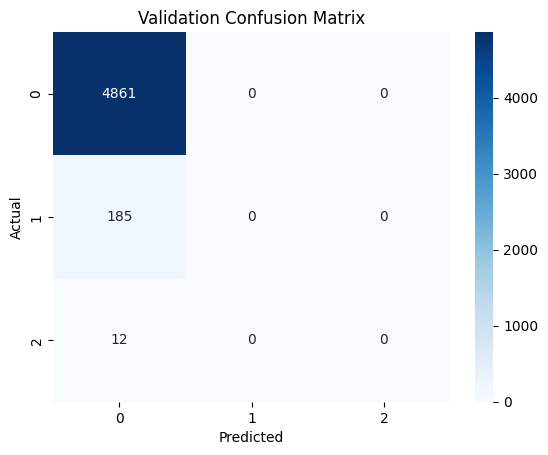



📊 Test Metrics:
Accuracy: 0.9639906799406905

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4551
           1       0.00      0.00      0.00       105
           2       0.00      0.00      0.00        65

    accuracy                           0.96      4721
   macro avg       0.32      0.33      0.33      4721
weighted avg       0.93      0.96      0.95      4721


Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


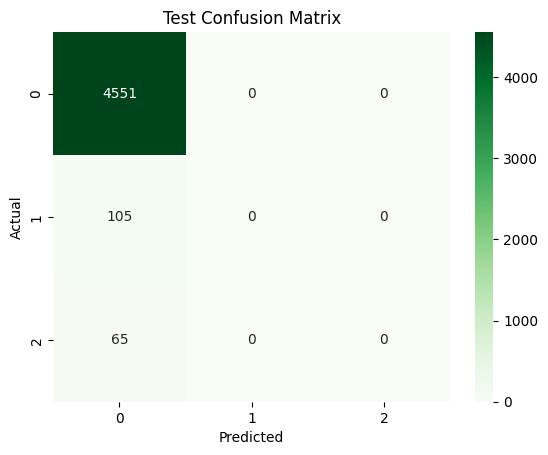

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on validation and test sets
y_val_pred_probs = model.predict(x_val)
y_test_pred_probs = model.predict(x_test)

# Get predicted class labels
y_val_preds = np.argmax(y_val_pred_probs, axis=1)
y_test_preds = np.argmax(y_test_pred_probs, axis=1)

print("📊 Validation Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_preds))
print("\nClassification Report:\n", classification_report(y_val, y_val_preds))
print("\nConfusion Matrix:")
val_cm = confusion_matrix(y_val, y_val_preds)
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\n\n📊 Test Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_preds))
print("\nClassification Report:\n", classification_report(y_test, y_test_preds))
print("\nConfusion Matrix:")
test_cm = confusion_matrix(y_test, y_test_preds)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Greens')
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [46]:
# Save the model
model.save("fall_detection_model.h5")